# Scikit Learn Notebook 

[Official documentation](https://scikit-learn.org/stable/tutorial/index.html)
***

<h1>Scikit-Learn</h1>
<h4>What is Scikit-Learn?</h4>
<p>Scikit-learn is an open source machine learning library for the Python pr ogramming language. It supports both supervised and unsupervised machine learning. Scikit-Learn is equipped with tools for model fitting, data processing, model selection and evaluation along with dozens of built-in classifaction, regression and clustering algorythems.</p>
<p>Scikit-Learn works on NumPy arrays, these are arrays consisting of one data type. The data is stored in an array named X and the outputs/labels in an array named Y. Scikit-Learn uses machine learning in order to make accurate predictions of the outputs.</p>

<h2>Algorythem 1 - Linear Regression</h2>


In [1]:
# Imports
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
%matplotlib notebook
%matplotlib inline

In [3]:
pima = data('Pima.tr')

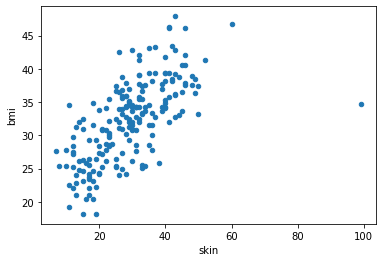

In [4]:
pima.plot(kind='scatter', x='skin', y='bmi')
plt.show()

In [5]:
# Test train split fro supervides training 
X_train, X_test, y_train, y_test = train_test_split(pima.skin, pima.bmi)

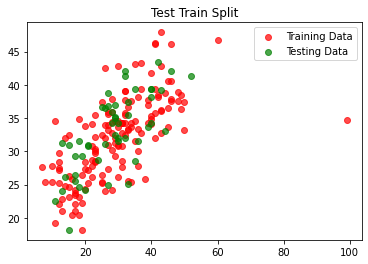

In [6]:
# Test train split visulizartion
plt.scatter(X_train, y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [7]:
# Create linear model and train it
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

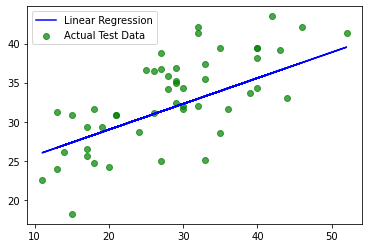

In [8]:
# Use model to predict on TEST data
prediction = LR.predict(X_test.values.reshape(-1,1))

#Plot prediction line against actual test data
plt.plot(X_test, prediction, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()

In [9]:
# Predict BMI of woman with skin fold 50
LR.predict(np.array([[50]]))[0]

38.88341770216482

In [10]:
# Score this model
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.4494258203950704

<h2>Algorythem 2 - Logistic Regression</h2>

In [11]:
# Imports
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
# Get the data and outputting a sample
titanic = data('titanic')
titanic.sample(5)

,class,age,sex,survived
176,1st class,adults,women,yes
908,3rd class,adults,man,no
697,3rd class,adults,man,no
517,2nd class,adults,women,yes
595,2nd class,child,man,yes


In [13]:
# Feature Engineering (one hot encoding = to classify catagories to fit with the model)
titanic = pd.get_dummies(titanic, drop_first = True)
titanic.sample(5)

# Dropped "class_1st", if class_2nd & class_3rd = 0 then the person was in 1st class
# if age_child = 1 then the person was a child or if = 0 the person was an adult 
# sex_woman = 1 if woman and 0 if man
# survived_yes is 1 if ther perosn survived and 0 if the person did not survive

,class_2nd class,class_3rd class,age_child,sex_women,survived_yes
862,0,1,0,0,0
162,0,0,0,0,0
1308,0,1,1,1,0
90,0,0,0,0,0
1063,0,1,0,0,0


In [14]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('survived_yes', axis=1), titanic['survived_yes'])

In [15]:
# Train the model using the training data
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# Prediciting if a class-1 child-age girl survived
LogReg.predict(np.array([[0,0,1,1]]))[0]

1

In [17]:
# Prediciting if a class-3 adult-age male survived
LogReg.predict(np.array([[0,1,0,1]]))[0]

1

In [18]:
# Scoring the model
LogReg.score(X_test, y_test)

0.756838905775076

In [19]:
# Understanding ther score
prediction = (LogReg.predict(X_test) > .5).astype(int)
np.sum(prediction == y_test) / len(y_test)

0.756838905775076

<h2>Algorythem 3 - Random Forest Model</h2>

In [65]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [66]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

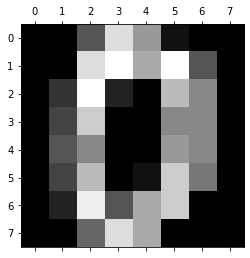

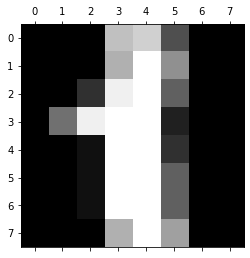

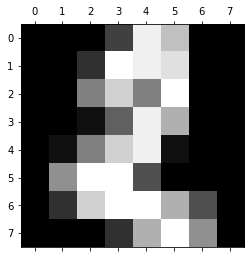

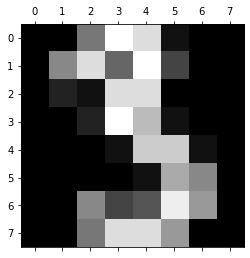

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [68]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [69]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [70]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), digits.target, test_size=0.2)

In [71]:
len(X_train)

1437

In [72]:
len(X_test)

360

In [73]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [74]:
model.score(X_test, y_test)

0.9722222222222222

In [80]:
y_predicted = model.predict(X_test)

In [81]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 34,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 31]], dtype=int64)

Text(69.0, 0.5, 'Truth')

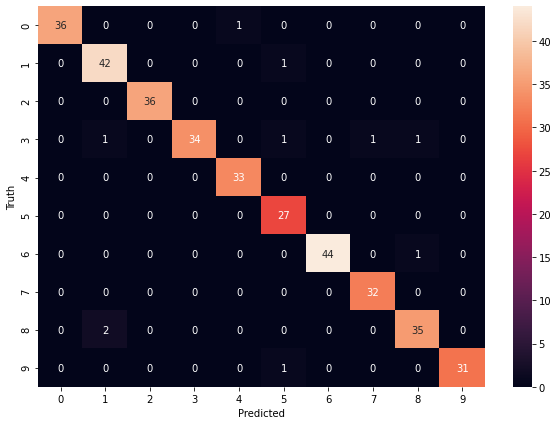

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')